# LAB 5: DECISION TREE 

# 21BCE5676 Sireesha Pamidimokkala

# Part A - Using Entropy

# OBJECTIVE 

The objective is the implementation of a Decision Tree that predicts outcomes using a  selected dataset. We'll use entropy and information gain followed by gini separately in the second part to pick the best attributes for splitting the tree. The goal is to improve its performance by adjusting settings related to the input data. We'll also try different ways of picking attributes to see what works best. Finally, we'll create a visual representation of the Decision Tree using graphiz for better understanding. Picking up a new dataset we will also explore Regression Tree.

# DATA DESCRIPTION
The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

DATASET ATTRIBUTES:
customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

# EXPLORATORY ANALYSIS

In [113]:
import pandas as pd

df=pd.read_csv('Telco_Churn.csv') #importing and saving the dataset
df.head(20) #showing starting 20 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [114]:
df.shape #get the shape of dataframe created

(7043, 21)

In [115]:
df.dtypes #check the data types of each column in dataframe

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [116]:
for col in df.columns: #Checking the unique values in each column
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']


In [117]:
df.isna().sum() #check the number of missing values in each column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [118]:
df = df.drop(columns = ['customerID']) #dropping the column id as it is irrelevant for our purpose
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
df.describe().T #getting the summary statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In the MultipleLines column there are 3 unique columns 'yes', 'no'  and 'no phone service', but the no phone service is nothing but the value 'No'.
So we've to replace 'no phone service' with 'no'

In [120]:
df['MultipleLines']=df['MultipleLines'].replace(['No phone service'],'No')
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

Presently in our datset we have categorial variables but for implementation of algorithms, we would need them to be in numerical formats. Thus I am using LabelEncoder class from sklearn.preprocessing module of Python’s scikit-learn library to transform the non numerical variables

In [121]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])

In [122]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [123]:
# Removing unwanted columns -
df.drop('TotalCharges',axis=1,inplace=True)
df.drop('Partner',axis=1,inplace=True)
df.drop('Dependents',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('PaperlessBilling',axis=1,inplace=True)
df.drop('SeniorCitizen',axis=1,inplace=True)
df.drop('OnlineBackup',axis=1,inplace=True)
df.drop('PaymentMethod',axis=1,inplace=True)
df.drop('TechSupport',axis=1,inplace=True)
df.drop('DeviceProtection',axis=1,inplace=True)

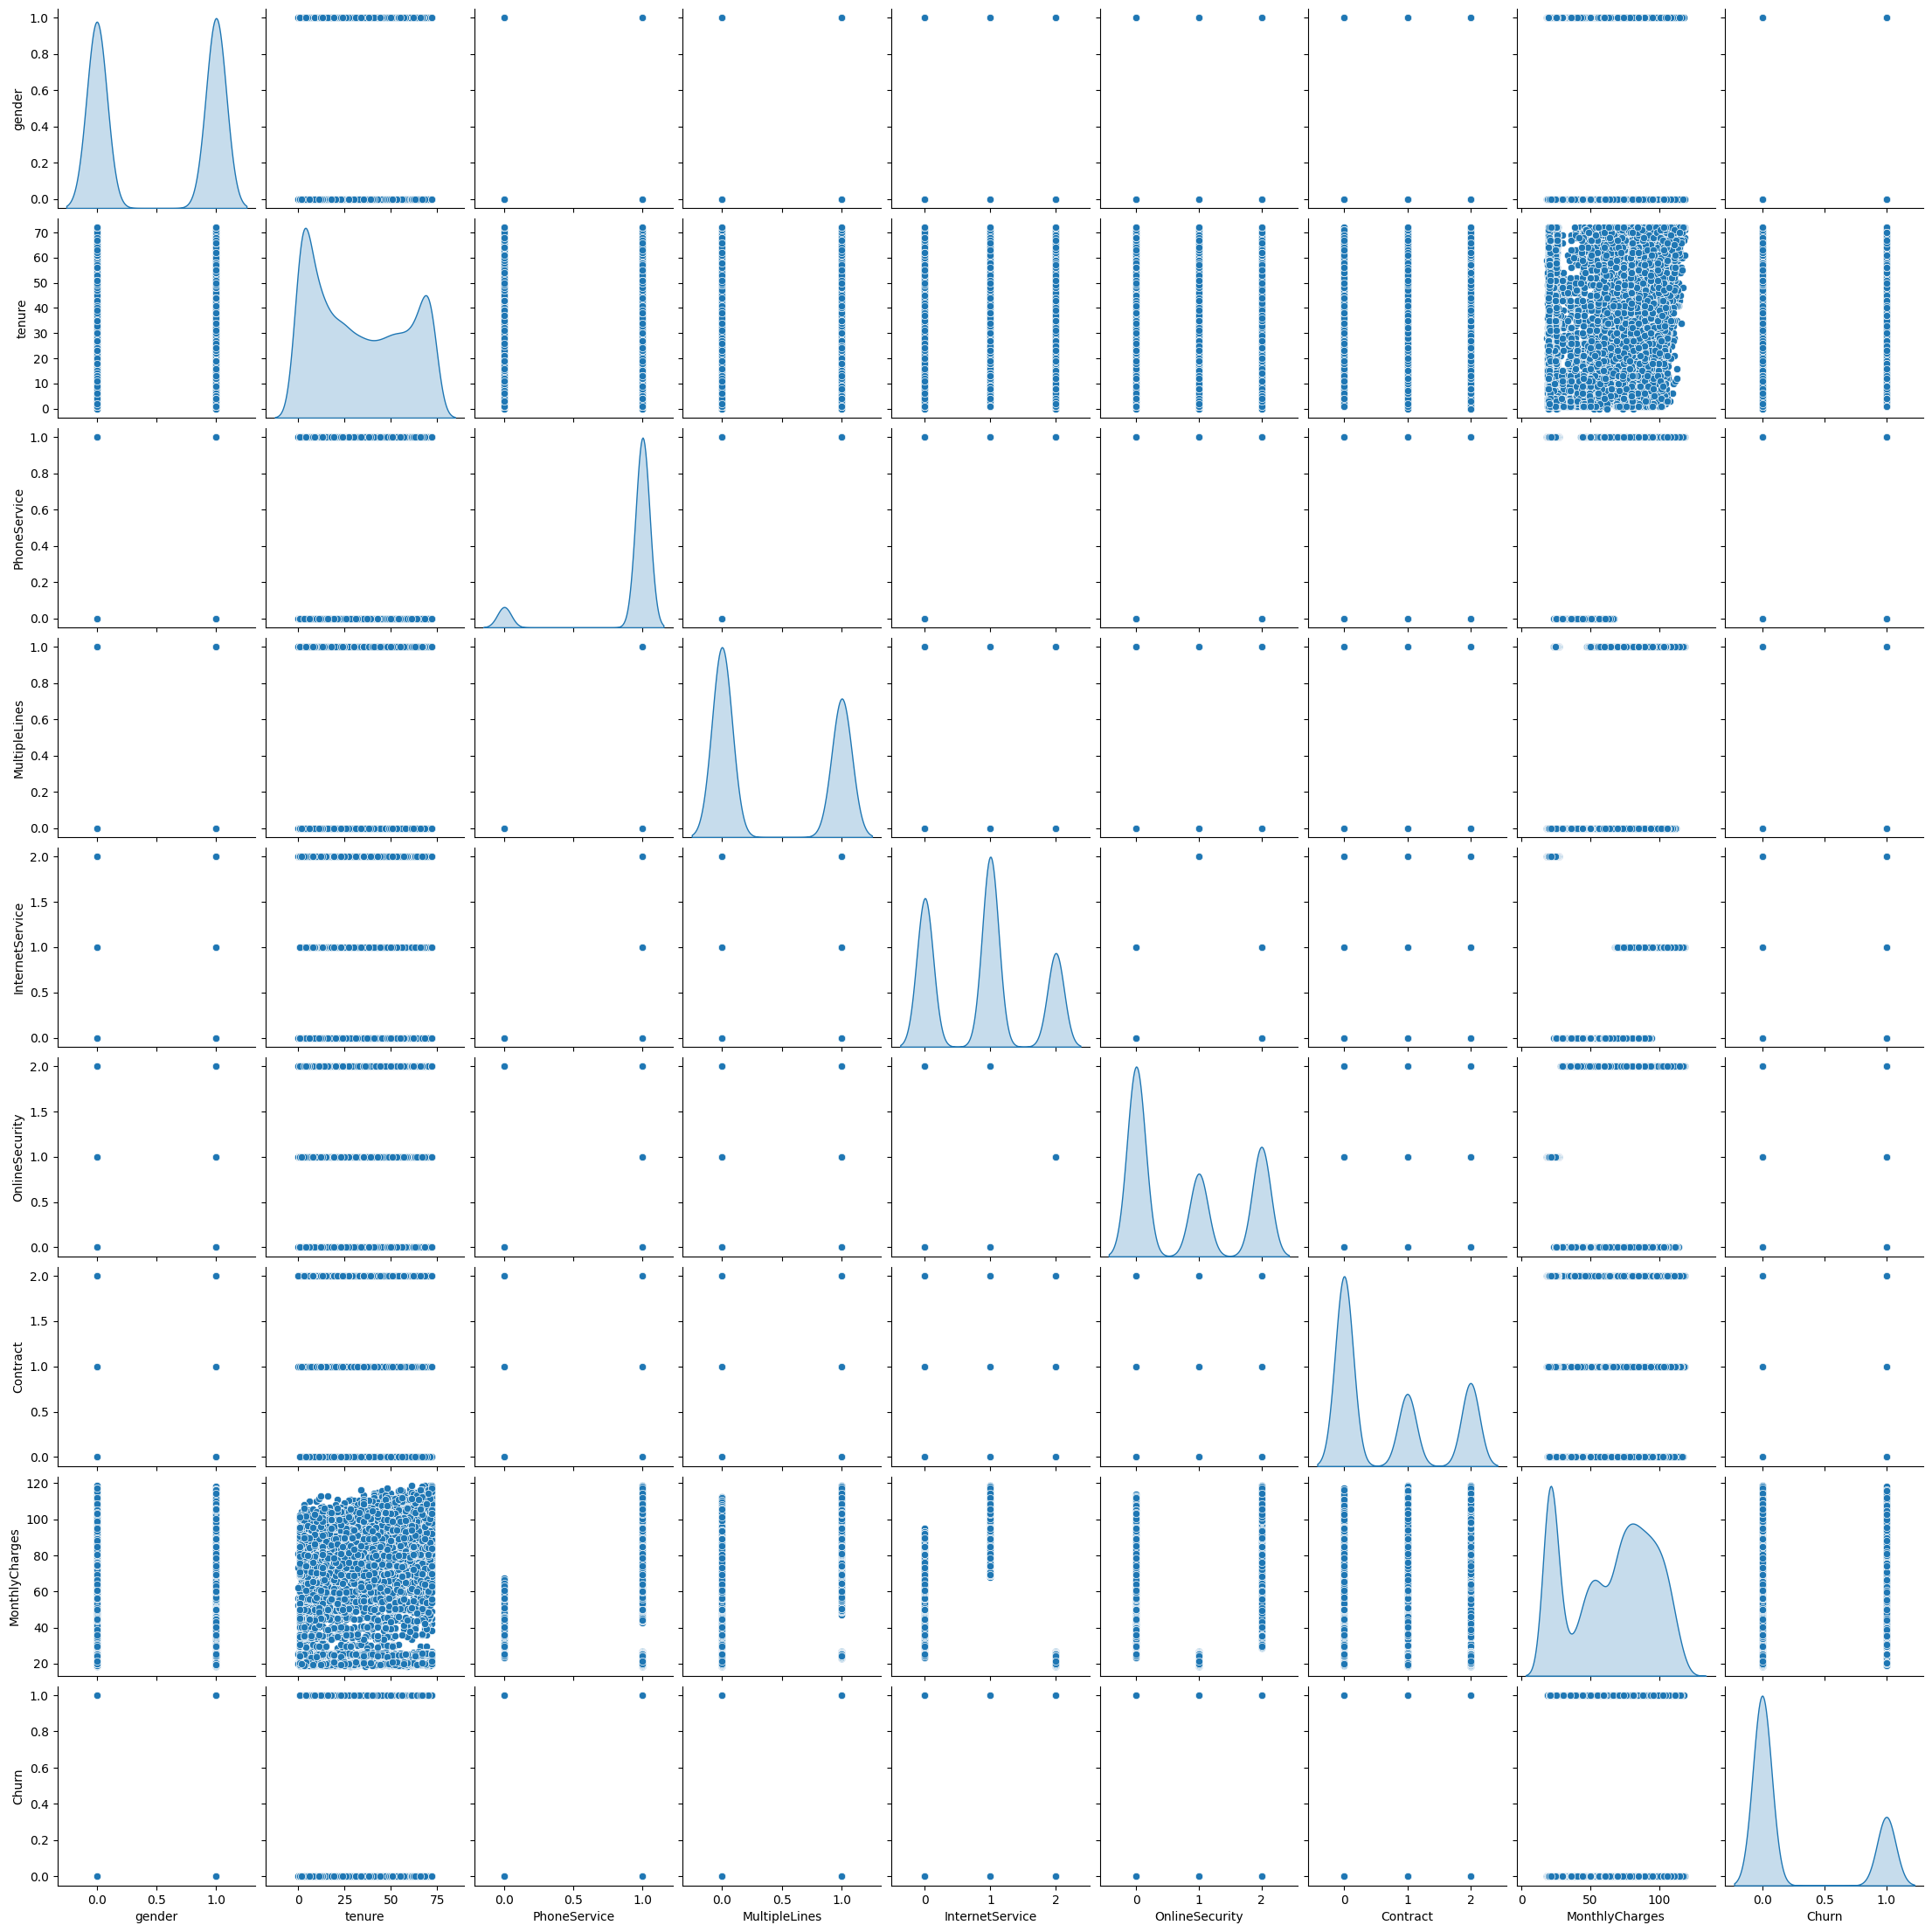

In [124]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [125]:
#getting the correlation matrix of dataframe
df.corr()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,Contract,MonthlyCharges,Churn
gender,1.000000,0.005106,-0.006488,-0.008414,-0.000863,-0.015017,0.000126,-0.014569,-0.008612
tenure,0.005106,1.000000,0.008448,0.331941,-0.030359,0.325468,0.671607,0.247900,-0.352229
PhoneService,-0.006488,0.008448,1.000000,0.279690,0.387436,-0.015198,0.002247,0.247398,0.011942
MultipleLines,-0.008414,0.331941,0.279690,1.000000,0.011124,0.002306,0.107114,0.490434,0.040102
InternetService,-0.000863,-0.030359,0.387436,0.011124,1.000000,-0.028416,0.099721,-0.323260,-0.047291
OnlineSecurity,-0.015017,0.325468,-0.015198,0.002306,-0.028416,1.000000,0.374416,-0.053878,-0.289309
Contract,0.000126,0.671607,0.002247,0.107114,0.099721,0.374416,1.000000,-0.074195,-0.396713
MonthlyCharges,-0.014569,0.247900,0.247398,0.490434,-0.323260,-0.053878,-0.074195,1.000000,0.193356
Churn,-0.008612,-0.352229,0.011942,0.040102,-0.047291,-0.289309,-0.396713,0.193356,1.000000


<Axes: >

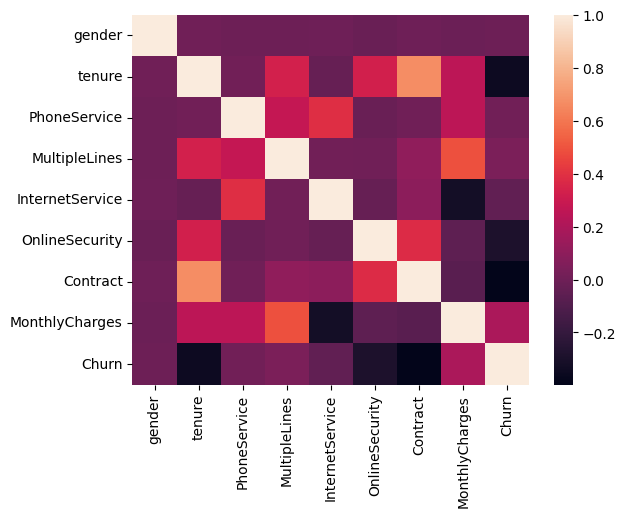

In [126]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

Hence we can infer that the following are independent variables:

1)gender 

2)tenure

3)PhoneService

4)MultipleLines

5)Internet Service

6)OnlineSecurity

7)OnlineBackup

8)DeviceProtection

9)TechSupport

10)Contract

11)PaymentMethod

12)MonthlyCharges

These can be used to predict the dependent variable- Churn

# Methodology

A decision tree is a supervised learning algorithm used in machine learning and data mining. It is a flowchart-like tree structure where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a decision. Decision trees are used for both classification and regression tasks.

Entropy is a measure of impurity or randomness in a dataset. In the context of decision trees, entropy is used to determine the best attribute to split the data at each node of the tree. The goal is to find the attribute that maximally reduces the uncertainty about the target variable. Entropy is used to calculate the information gain, which helps s in deciding the splitting criterion for the decision tree. The steps involved are -:

1) Calculate Entropy:

For each class in the target variable, calculate the entropy. Entropy measures the impurity or disorder in the data).
2) Calculate Information Gain:

For each feature in the dataset, calculate the information gain. Information gain measures the reduction in entropy achieved by splitting the data on a particular feature.


3) Select Best Attribute:

Choose the attribute with the highest information gain as the root node of the tree. This attribute will be the first to split the dataset.

4) Repeat for Subsets:

For each branch created by the split, repeat the process recursively. Calculate entropy and information gain for the subsets and choose the best attribute to split on.

5) Stop Criteria:

Define stopping criteria to decide when to stop growing the tree. This could include a maximum depth, a minimum number of samples per leaf, or a threshold for information gain.

6) Create Tree Structure:

As we proceed, we're creating a tree structure where nodes represent decisions based on attribute values, and leaves represent the predicted outcomes.

7) Visualize the Decision Tree:

Once the tree is constructed, visualize it for better interpretation. This visualization helps in understanding how the model makes decisions based on different input features.

8) Optimize Parameters:

Optionally, fine-tune the model by adjusting hyperparameters or exploring different attribute selection measures. This step is important for achieving better performance.

9) Evaluate and Validate:

Assess the performance of the Decision Tree on validation or test datasets. This step helps ensure the model generalizes well to new, unseen data.

In [127]:
#Test split
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1) #Seperates all columns except stroke from datset and stores them in X
y = df['Churn'] #Stores stroke column in Y.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=125) #This line splits data into training and testing sets on the parameters that 33% will be used for testing


In [128]:
# The fit_transform method assigns a unique numerical label to each unique category in the target variable y.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [129]:
X_train.shape , X_test.shape

((4718, 8), (2325, 8))

In [130]:
y_train.shape , y_test.shape

((4718,), (2325,))

__Trying with standard max_depth of 3__

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_en3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [132]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = clf_en3.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7819354838709678
F1 Score: 0.8069193268417321


__With a depth of 3, our model's accuracy is 78 percent. Lets increase the depth to 5 and check the accuracy__


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_en5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [134]:
y_pred = clf_en5.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7939784946236559
F1 Score: 0.8111384740329245


__Here we can observe that with an increase in depth to 5, the accuracy has increased to 79.39 percent. Lets further test by increasing depth to 6__

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_en6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
clf_en6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [136]:
y_pred = clf_en6.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.792258064516129
F1 Score: 0.8055493589819224


__The accuracy ahs decreased to 79.225 percent. Thus we will stick to a depth of 5 for highest accuracy possible__

[Text(0.5270833333333333, 0.9166666666666666, 'x[6] <= 0.5\nentropy = 0.827\nsamples = 4718\nvalue = [3490, 1228]'),
 Text(0.26666666666666666, 0.75, 'x[5] <= 0.5\nentropy = 0.982\nsamples = 2561\nvalue = [1485, 1076]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[1] <= 7.5\nentropy = 1.0\nsamples = 1736\nvalue = [864, 872]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[4] <= 0.5\nentropy = 0.945\nsamples = 715\nvalue = [259, 456]'),
 Text(0.03333333333333333, 0.25, 'x[1] <= 1.5\nentropy = 1.0\nsamples = 292\nvalue = [147, 145]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.983\nsamples = 118\nvalue = [50, 68]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.99\nsamples = 174\nvalue = [97, 77]'),
 Text(0.1, 0.25, 'x[1] <= 1.5\nentropy = 0.834\nsamples = 423\nvalue = [112, 311]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.569\nsamples = 149\nvalue = [20, 129]'),
 Text(0.11666666666666667, 0.08333333333333333, 'entropy = 0.921\nsamples = 2

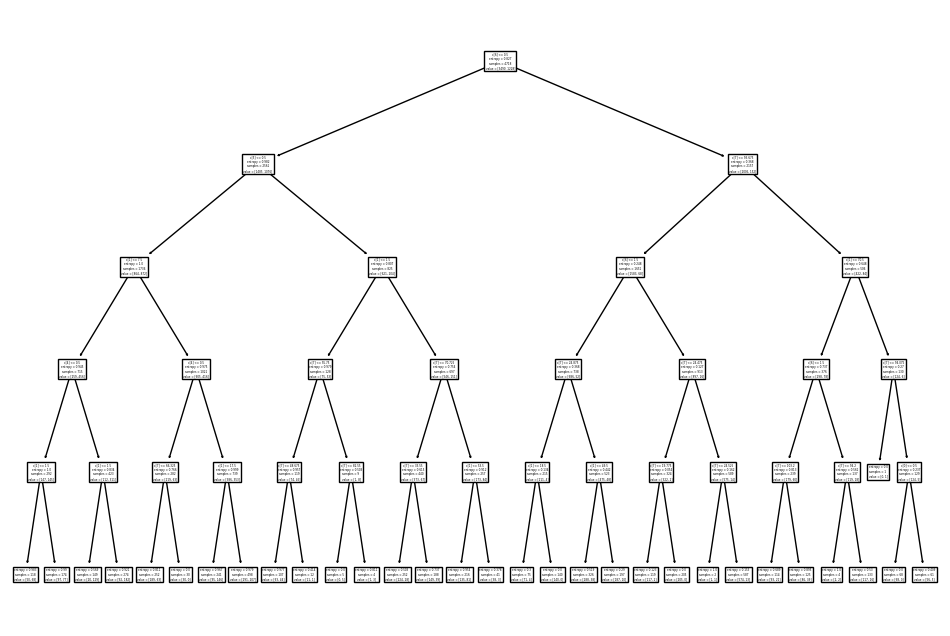

In [137]:
import matplotlib.pyplot as plt
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en5.fit(X_train, y_train)) 

In [138]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


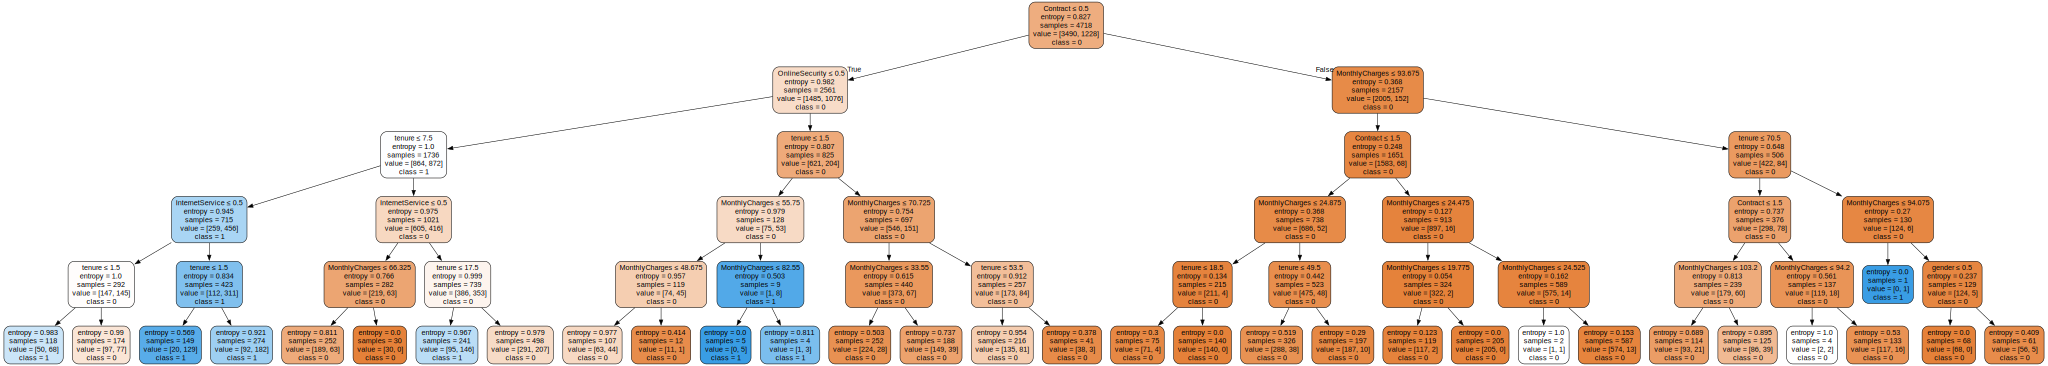

In [139]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Sireesha\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin'
from IPython.display import display
import graphviz
from sklearn import tree

# Visualization code
dot_data = tree.export_graphviz(
    clf_en5, 
    out_file=None, 
    feature_names=X.columns,
    class_names=list(map(str, clf_en5.classes_)),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

# Result analysis

In [140]:
from sklearn.metrics import  classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf_en5.predict(X_test)


# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1684
           1       0.70      0.44      0.54       641

    accuracy                           0.79      2325
   macro avg       0.76      0.68      0.70      2325
weighted avg       0.78      0.79      0.78      2325



1) Precision:

Precision for class 0 (Not Churn): 0.81
Out of all instances predicted as not churning, 81% are actually not churning.

Precision for class 1 (Churn): 0.70
Out of all instances predicted as churning, 70% are actually churning.

2) Recall:

Recall for class 0 (Not Churn): 0.93
Out of all instances that are actually not churning, the model correctly identifies 93%.

Recall for class 1 (Churn): 0.44
Out of all instances that are actually churning, the model correctly identifies 44%.

3) F1-Score:

F1-Score is the harmonic mean of precision and recall and provides a balance between the two.
F1-Score for class 0 (Not Churn): 0.87
F1-Score for class 1 (Churn): 0.54

4) Support:

Number of instances in each class (0 and 1) in the test set.
Class 0 (Not Churn): 1684 instances
Class 1 (Churn): 641 instances

5) Accuracy:

Overall accuracy of the model: 0.79 (79%)
The proportion of correctly classified instances out of the total instances.

6) Macro Average and Weighted Average:

Macro Avg: Unweighted average of precision, recall, and F1-score across classes.

Weighted Avg: Average where each class's contribution is weighted by the number of instances.
Interpretation:

The model performs well in predicting instances of class 0 (Not Churn) with high precision and recall, suggesting it is effective in identifying customers who do not churn.
For class 1 (Churn), precision is decent, indicating that when the model predicts churn, it is often correct. However, recall is lower, indicating that the model may miss some instances of actual churn.
The weighted average takes into account the class imbalance, providing a more comprehensive evaluation of the overall model performance.

In [141]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en5.predict(X_train)

print('Model accuracy score with criterion entropy: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.5f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.79398
Training-set accuracy score: 0.79822


In [142]:
print('Training set score: {:.4f}'.format(clf_en5.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en5.score(X_test, y_test)))

Training set score: 0.7982
Test set score: 0.7940


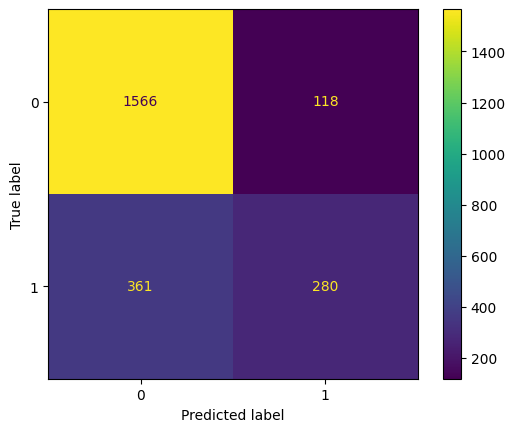

In [143]:
# Display confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True Positive (TP): Customers correctly predicted as churning (Yes)->280

True Negative (TN): Customers correctly predicted as not churning (No)->1566

False Positive (FP): Customers incorrectly predicted as churning (Yes), but they did not->118

False Negative (FN): Customers incorrectly predicted as not churning (No), but they did->361

# B) CART using Gini


The Gini index is a measure of impurity used in decision tree algorithms for classification tasks. It quantifies the likelihood of misclassifying a randomly chosen element in the dataset. A lower Gini index indicates a purer node, meaning that the samples in the node belong to the same class The Gini index for a node
t is calculated as follow

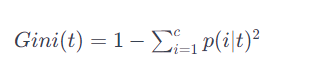s:

In the context of decision trees, the algorithm uses the Gini index to evaluate candidate splits during the tree-building process. The idea is to choose splits that result in nodes with lower Gini indices, leading to more homogenous child nodeThe formula for the Gini index for a split on feature is:

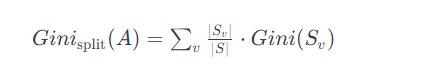:s.

.

# Methodology 

1) Calculate Gini Index for the entire dataset


2) Split the dataset based on a feature:

For each feature, calculate the Gini index for each possible split)3) Calculate the weighted Gini index for each split:

Weighted Gini Index (WGI) = Σ (Weight_i * Gini_i)
Weight_i = (Number of instances in split i) / (Total number of instanc

4) Choose the split with the lowest weighted Gini index:

Select the split that minimizes the weighted Gini index.es)t.

4) Repeat for Subsets:

For each branch created by the split, repeat the process recurslit on.

5) Stop Criteria:

Define stopping criteria to decide when to stop growing the tree. This could include a maximum depth, a minimum number of samples per leaf, or a threshold for information gain.

6) Create Tree Structure:

As we proceed, we're creating a tree structure where nodes represent decisions based on attribute values, and leaves represent the predicted outcomes.

7) Visualize the Decision Tree:

Once the tree is constructed, visualize it for better interpretation. This visualization helps in understanding how the model makes decisions based on different input features.

8) Optimize Parameters:

Optionally, fine-tune the model by adjusting hyperparameters or exploring different attribute selection measures. This step is important for achieving better performance.

9) Evaluate and Validate:

Assess the performance of the Decision Tree on validation or test datasets. This step helps ensure the model generalizes well to new, unseen data.


__First trying with standard depth 3-:__

In [144]:
clf_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [145]:
y_pred = clf_gini3.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7819354838709678
F1 Score: 0.8069193268417321


__For depth 3, we have an accuracy of 78 percent. Lets scale upto 5 and check-__

In [146]:
clf_gini5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [147]:
y_pred = clf_gini5.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7939784946236559
F1 Score: 0.8111384740329245


__The accuracy has increased to 79.39. Testing with depth of 7 to see if its better:-__

In [148]:
clf_gini6 = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [149]:
y_pred = clf_gini6.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7931182795698924
F1 Score: 0.8037244762189845


__Depth of 6 drops the accuracy to 79.31 so we can safely choose a depth of 5 as our last model.__

[Text(0.5, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.385\nsamples = 4718\nvalue = [3490, 1228]'),
 Text(0.25, 0.75, 'x[5] <= 0.5\ngini = 0.487\nsamples = 2561\nvalue = [1485, 1076]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 7.5\ngini = 0.5\nsamples = 1736\nvalue = [864, 872]'),
 Text(0.0625, 0.4166666666666667, 'x[4] <= 0.5\ngini = 0.462\nsamples = 715\nvalue = [259, 456]'),
 Text(0.03125, 0.25, 'x[1] <= 1.5\ngini = 0.5\nsamples = 292\nvalue = [147, 145]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.488\nsamples = 118\nvalue = [50, 68]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.493\nsamples = 174\nvalue = [97, 77]'),
 Text(0.09375, 0.25, 'x[1] <= 1.5\ngini = 0.389\nsamples = 423\nvalue = [112, 311]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.232\nsamples = 149\nvalue = [20, 129]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.446\nsamples = 274\nvalue = [92, 182]'),
 Text(0.1875, 0.4166666666666667, 'x[4] <= 0.5\ngini = 0.483\nsamples = 1021\nvalue = [605, 416]'),

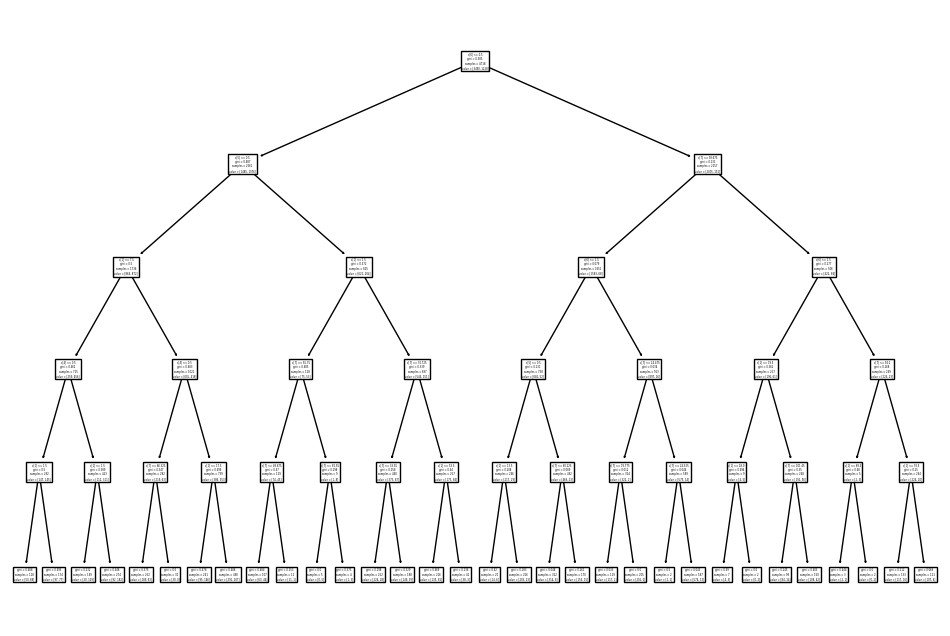

In [150]:
import matplotlib.pyplot as plt
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini5.fit(X_train, y_train)) 

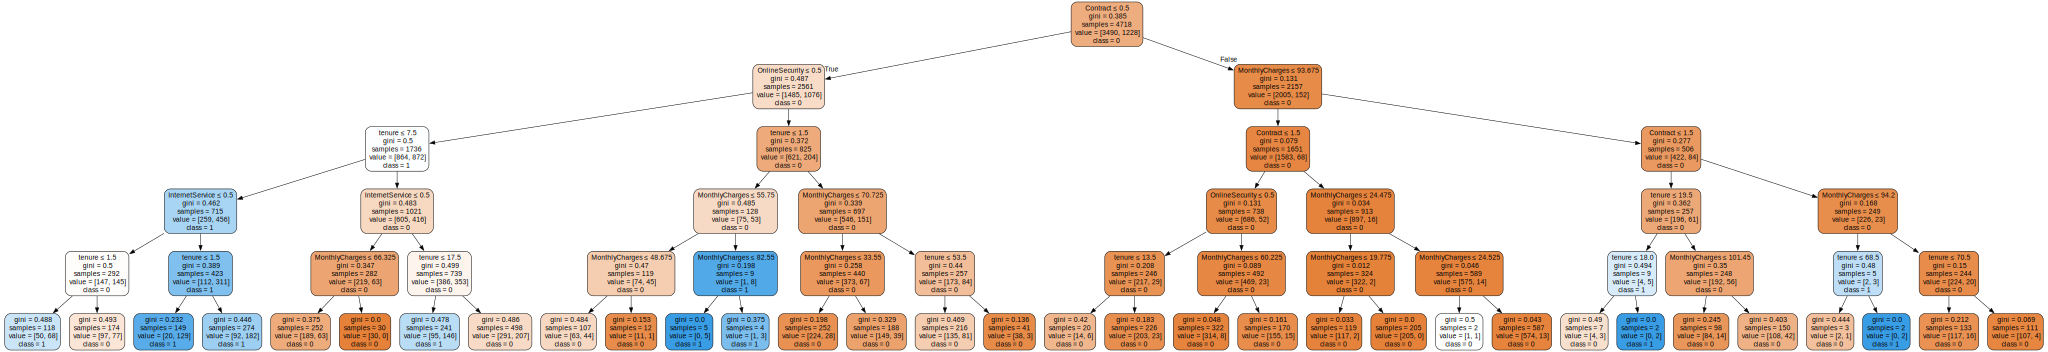

In [151]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Sireesha\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin'
from IPython.display import display
import graphviz
from sklearn import tree

# Visualization code
dot_data = tree.export_graphviz(
    clf_gini5, 
    out_file=None, 
    feature_names=X.columns,
    class_names=list(map(str, clf_gini5.classes_)),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

# Result Analysis

In [152]:
from sklearn.metrics import  classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf_gini5.predict(X_test)


# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1684
           1       0.70      0.44      0.54       641

    accuracy                           0.79      2325
   macro avg       0.76      0.68      0.70      2325
weighted avg       0.78      0.79      0.78      2325



1) Precision:

Precision for class 0 (Not Churn): 0.81
Out of all instances predicted as not churning, 81% are actually not churning.
Precision for class 1 (Churn): 0.70
Out of all instances predicted as churning, 70% are actually churning.

2) Recall:

Recall for class 0 (Not Churn): 0.93
Out of all instances that are actually not churning, the model correctly identifies 93%.
Recall for class 1 (Churn): 0.44
Out of all instances that are actually churning, the model correctly identifies 44%.

3) F1-Score:

F1-Score is the harmonic mean of precision and recall and provides a balance between the two.
F1-Score for class 0 (Not Churn): 0.87
F1-Score for class 1 (Churn): 0.54

4) Support:

Number of instances in each class (0 and 1) in the test set.
Class 0 (Not Churn): 1684 instances
Class 1 (Churn): 641 instances

5) Accuracy:

Overall accuracy of the model: 0.79 (79%)
The proportion of correctly classified instances out of the total instances.

9) Macro Average and Weighted Average:

Macro Avg: Unweighted average of precision, recall, and F1-score across classes.
Weighted Avg: Average where each class's contribution is weighted by the number of instances.
Interpretation:

The model performs well in predicting instances of class 0 (Not Churn) with high precision and recall, suggesting it is effective in identifying customers who do not churn.
For class 1 (Churn), precision is decent, indicating that when the model predicts churn, it is often correct. However, recall is lower, indicating that the model may miss some instances of actual churn.
The weighted average takes into account the class imbalance, providing a more comprehensive evaluation of the overall model performance.

In [153]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_gini5.predict(X_train)

print('Model accuracy score with criterion gini: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.5f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion gini: 0.79398
Training-set accuracy score: 0.79886


In [154]:
print('Training set score: {:.4f}'.format(clf_gini5.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini5.score(X_test, y_test)))

Training set score: 0.7989
Test set score: 0.7940


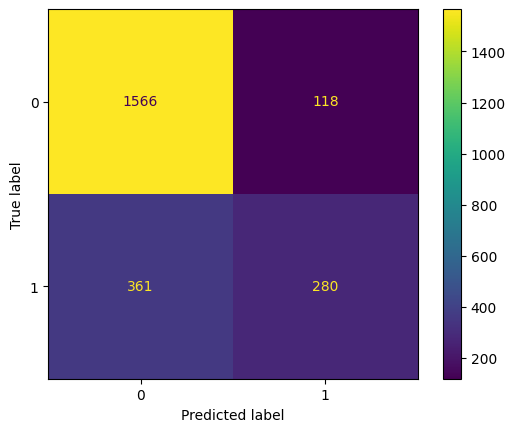

In [155]:
# Display confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True Negatives (1527):

The model correctly predicted 1527 instances as not churning.

False Positives (157):

The model incorrectly predicted 157 instances as churning, but they actually did not.

False Negatives (324):

The model incorrectly predicted 324 instances as not churning, but they actually did.

True Positives (317):

The model correctly predicted 317 instances as churning.

# Regression Tree


A decision regression tree is a type of decision tree used for regression analysis. Decision trees are a machine learning algorithm that partitions the input space into regions and assigns a predictive model to each region. While traditional decision trees are commonly used for classification tasks, decision regression trees are specifically designed for predicting numerical or continuous outcomes.

In a decision regression tree, the nodes represent decision points based on input features, and the branches lead to different outcomes or values. At each node, the algorithm makes decisions on how to split the data based on specific feature thresholds. The goal is to create a tree structure that provides a step-by-step decision-making process leading to a numerical prediction at the leaf nodes.

The predictive model at each leaf node is typically a constant value or an average value of the target variable within that region. The process of building the tree involves recursively partitioning the data until certain stopping criteria are met, such as reaching a maximum depth or a minimum number of data points in a leaf node.

# DATA DESCRIPTION
The dataset consists of data related to petrol consumption (in millions of gallons) for 48 US states. This value is based upon several features such as the petrol tax (in cents), Average income (dollars), paved highways (in miles), and the proportion of the population with a driver’s license. 

In [156]:
df=pd.read_csv('petrol.csv') #importing and saving the dataset
df.head(20) #showing starting 20 rows

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


# Exploratory Data Analysis of new data

In [157]:
df.shape #get the shape of dataframe created

(48, 5)

In [158]:
df.isna().sum() #check the number of missing values in each column

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [159]:
df.dtypes #check the data types of each column in dataframe

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [160]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])

In [161]:
df.describe().T #getting the summary statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [162]:
df.isna().sum() #check the number of missing values in each column

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

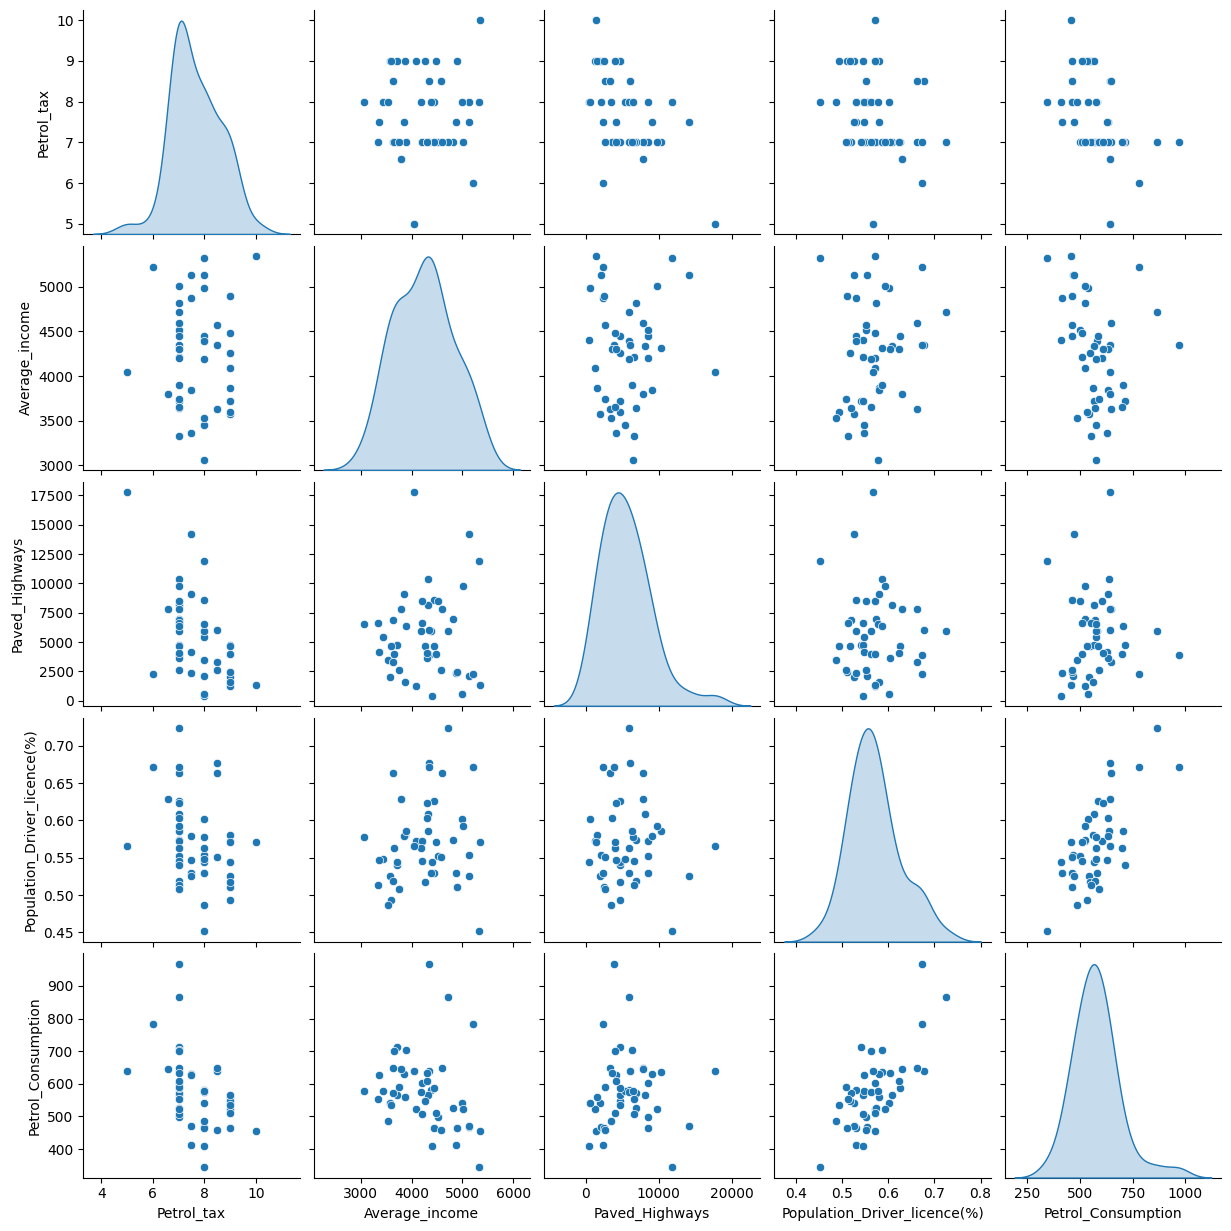

In [163]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [164]:
#getting the correlation matrix of dataframe
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

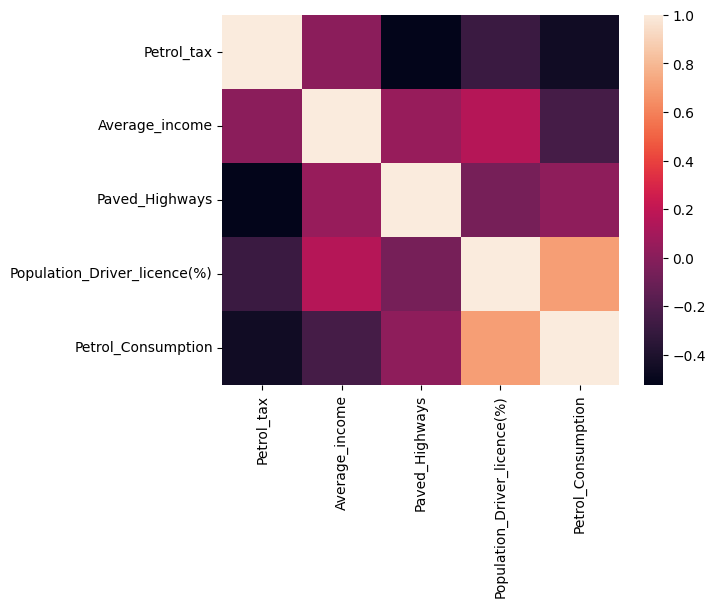

In [165]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

Hence we can infer that the following are independent variables:
1)petrol_tax 
2)Average_income
3)Paved_Highways
4)Population_Driver_licence(%)

These can be used to predict the dependent variable- Petrol Consumption

In [166]:
#Test split
X = df.drop("Petrol_Consumption", axis=1)  # independent variables
y = df["Petrol_Consumption"]  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=28) #This line splits data into training and testing s

In [167]:
X_train.shape, y_train.shape

((38, 4), (38,))

In [168]:
X_test.shape, y_test.shape

((10, 4), (10,))

In [169]:
from sklearn.tree import DecisionTreeRegressor # for building the model
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

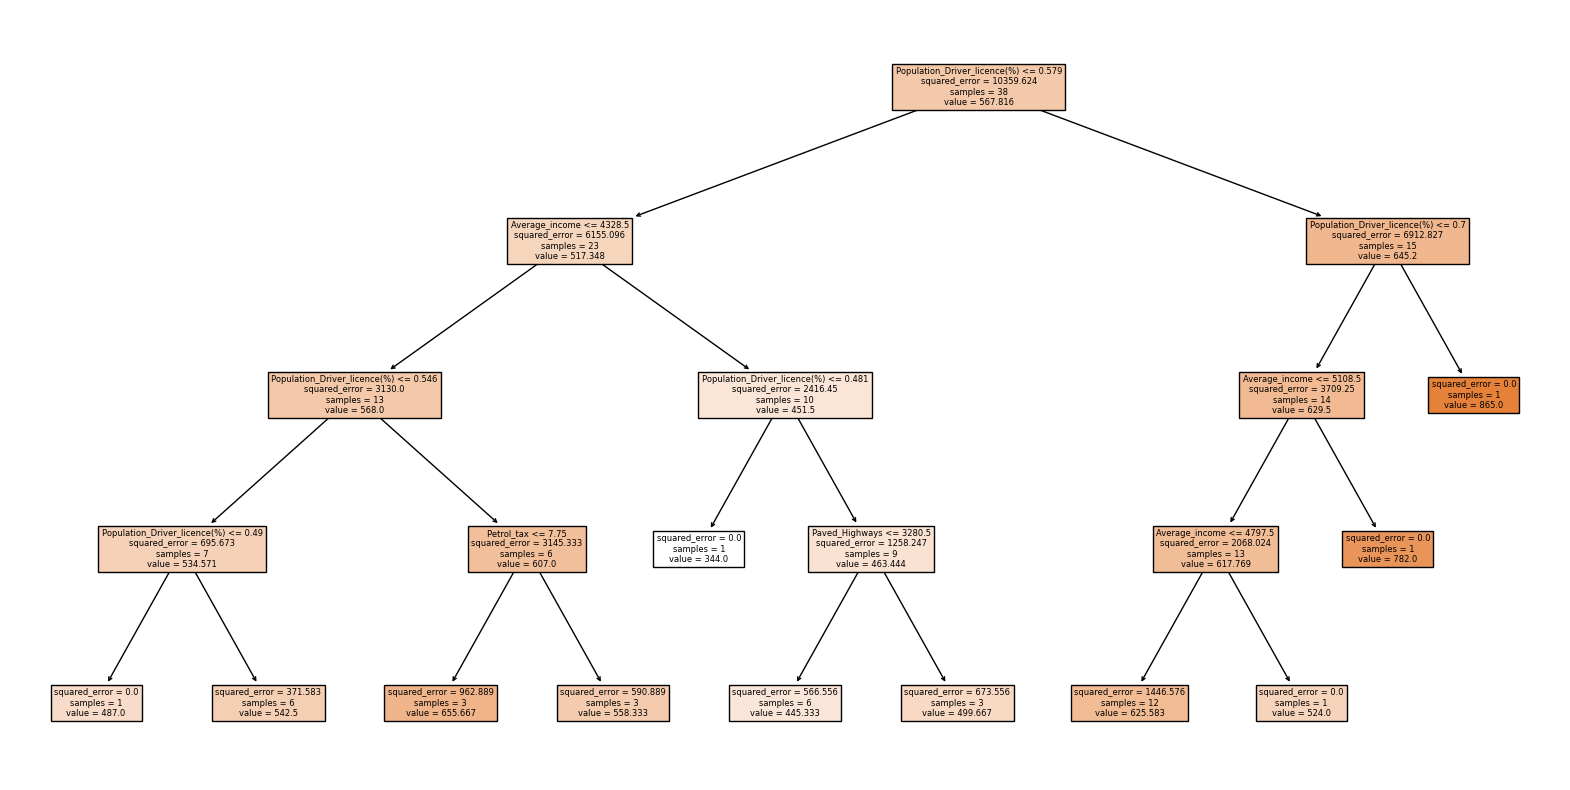

In [170]:
#Visualisation
fig, ax = plt.subplots(figsize=(20,10))
final = DecisionTreeRegressor(max_depth=4, random_state=0)
final.fit(X_train, y_train)
plot_tree(final, feature_names=X.columns.tolist(), filled=True)
plt.show()

# Result Analysis

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate predictions
y_pred = final.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 78.39166666666665
Mean Squared Error (MSE): 16022.214583333329
Root Mean Squared Error (RMSE): 126.57888679923413
R-squared (R2 ): 0.11024078025133455


Mean Absolute Error (MAE):

MAE is the average absolute difference between the predicted and actual values.
MAE = 78.39 means, on average, the model's predictions are off by approximately 78.39 million gallons of petrol.

Mean Squared Error (MSE):

MSE is the average of the squared differences between predicted and actual values.
MSE = 16022.21 represents the average squared error, giving higher weight to larger errors.

Root Mean Squared Error (RMSE):

RMSE is the square root of MSE and provides an interpretable measure of the average prediction error.
RMSE = 126.58 indicates the average prediction error is approximately 126.58 million gallons.

R-squared (R2):

R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
R2 = 0.11 means that the model explains approximately 11% of the variance in petrol consumption.

Interpretation:

The MAE, MSE, and RMSE values give insights into the average prediction errors, with RMSE providing a more interpretable measure in the same units as the target variable (million gallons).
The R-squared value indicates the proportion of variability in petrol consumption explained by the model. An R2 of 0.11 suggests that the chosen features in the model can explain only a small portion (11%) of the variance in petrol consumption. This might indicate that other factors not included in the model influence petrol consumption. 

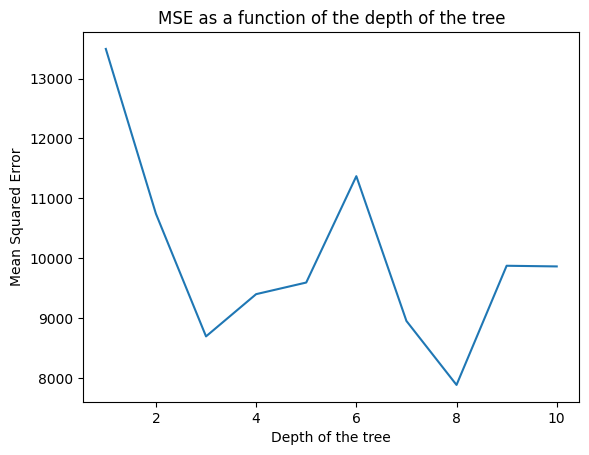

In [172]:
# Trying to improvise the model by trting out various depths

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# List of depths to try
depths = list(range(1, 11))

# List to store the MSE for each depth
errors = []

for depth in depths:
    # Train a decision tree regressor with the current depth
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dtr.fit(X_train, y_train)
    
    # Make predictions on the validation set and calculate the MSE
    y_pred = dtr.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    
    # Store the MSE
    errors.append(error)

# Plot the MSEs
plt.plot(depths, errors)
plt.xlabel('Depth of the tree')
plt.ylabel('Mean Squared Error')
plt.title('MSE as a function of the depth of the tree')
plt.show()

Looking at the graph we can reduce that before 8 we have scores of MSE and after it we can observe overfitting. Thus we can update depth to 8 to get the most optimised model

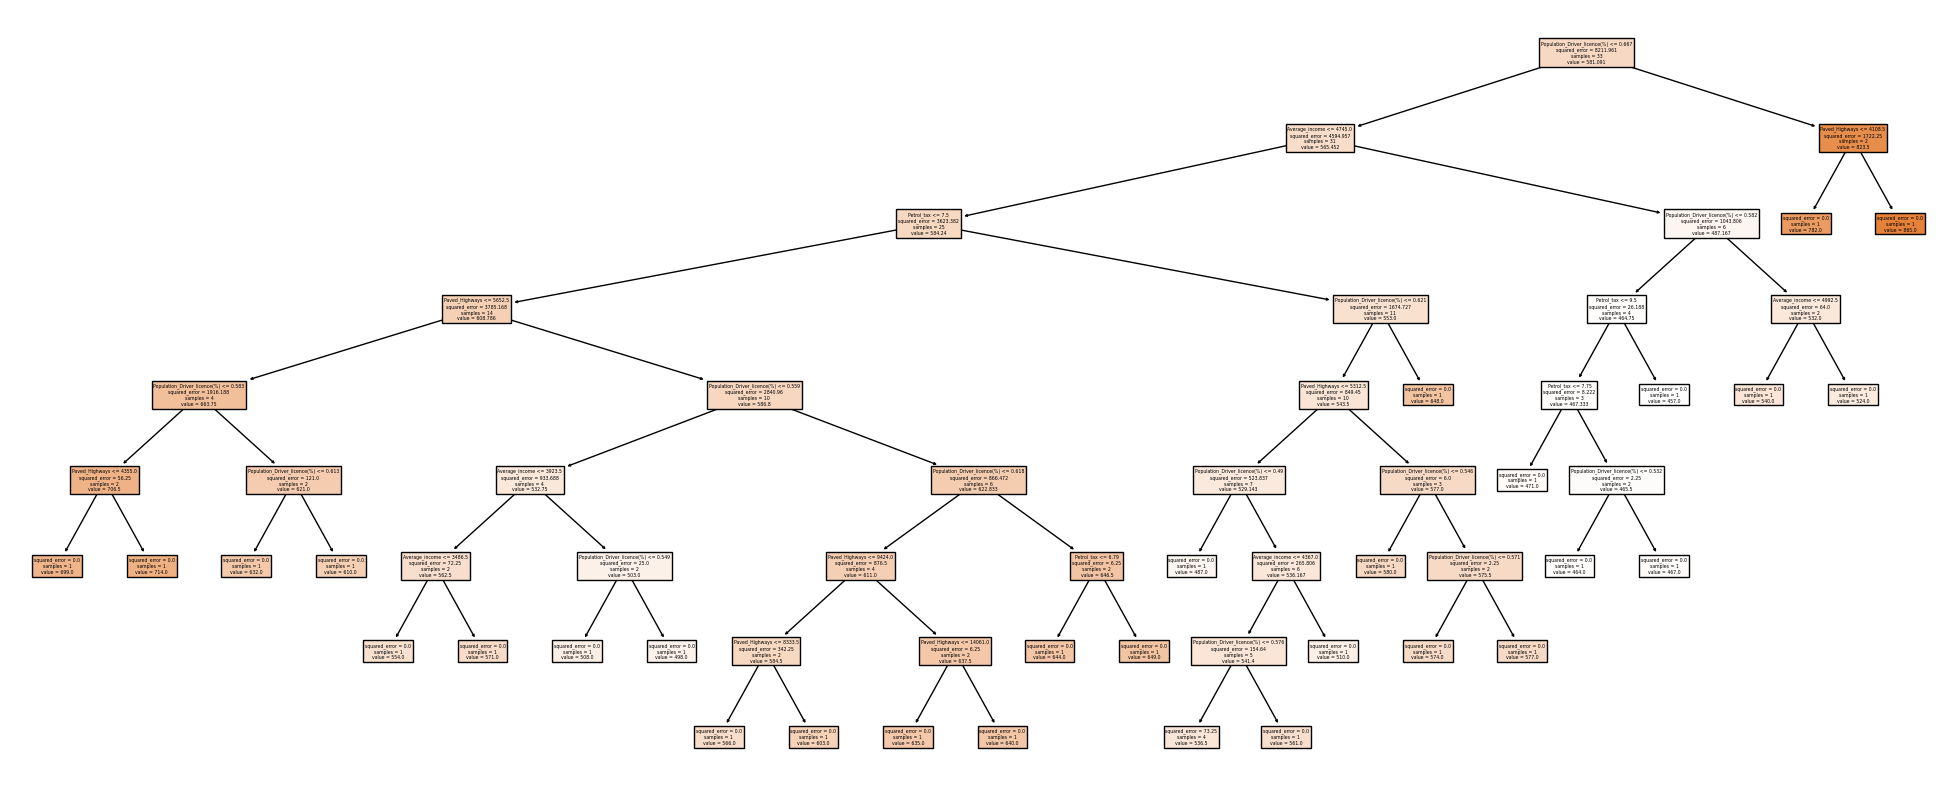

In [173]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Initialize the model
dtr = DecisionTreeRegressor(max_depth=8, random_state=2529)

# Train the model
dtr.fit(X_train, y_train)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(25,10))

# Plot the tree
plot_tree(dtr, feature_names=X.columns.tolist(), filled=True)

# Show the plot
plt.show()

In [174]:
# Generate predictions with the new tree
y_pred_new = dtr.predict(X_test)

# Calculate metrics for the new tree
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)  
r2_new = r2_score(y_test, y_pred_new)

print(f"Mean Absolute Error (MAE) for new tree: {mae_new}")
print(f"Mean Squared Error (MSE) for new tree: {mse_new}")
print(f"Root Mean Squared Error (RMSE) for new tree: {rmse_new}")
print(f"R-squared (R2) for new tree: {r2_new}")

Mean Absolute Error (MAE) for new tree: 32.65
Mean Squared Error (MSE) for new tree: 4713.925
Root Mean Squared Error (RMSE) for new tree: 68.6580293920529
R-squared (R2) for new tree: 0.7382223157642209


Thus we were able to improvise the model.

# Conclusion

On the churn dataset, I applied both entropy-based and gini-based CART and found the entropy one slightly better.
In the second dataset, I applied Regression Tree and optimized it. But due to dataset limitations, the model is still having more RMSE.

# References

1) https://medium.com/@theclickreader/decision-tree-regression-explained-with-implementation-in-python-1e6e48aa7a47

2) https://www.kaggle.com/datasets/blastchar/telco-customer-churn

3) https://prutor.ai/decision-tree-regression-using-sklearn/

4) https://www.datacamp.com/tutorial/decision-tree-classification-python